In [1]:
import pandas as pd
import numpy as np
import warnings  
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC 
plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv('~/Desktop/Datasets/audit_data.csv')

In [3]:
df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [4]:
#Delete the columns that do 
cols_del=['LOCATION_ID','TOTAL']

df.drop(cols_del, axis=1, inplace=True)

In [5]:
#Data Exploration
df.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
df.isna().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [7]:
df['Money_Value'].fillna((df['Money_Value'].mean()), inplace=True)

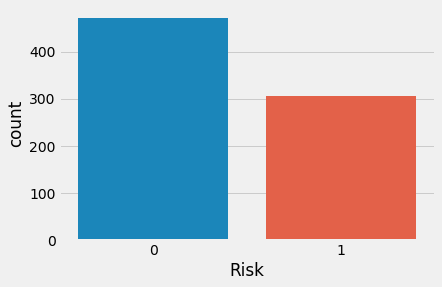

In [346]:
sns.countplot(df['Risk'], label = "Count") 

In [98]:
y=df['Risk']

In [357]:
random_forest_e = RandomForestClassifier(n_estimators = 100,criterion='entropy', random_state = 47)
random_forest_e.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)

In [358]:
acc_rande = cross_val_score(estimator = random_forest_e, X = X_train_scaled, y = y_train, cv = kfold, scoring=scoring)
acc_rande.mean()

0.9983870967741936

In [34]:
from dmba import classificationSummary, gainsChart, liftChart

no display found. Using non-interactive Agg backend


In [35]:
classificationSummary(y_test, y_predict_logi)
classificationSummary(y_test, y_predict_r)

Confusion Matrix (Accuracy 0.9808)

       Prediction
Actual  0  1
     0 93  2
     1  1 60
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual  0  1
     0 95  0
     1  0 61


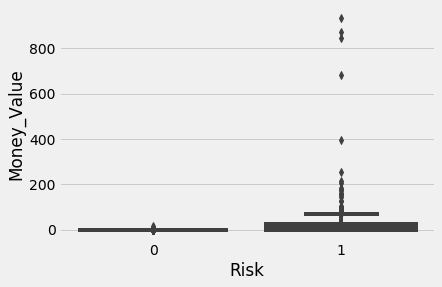

In [37]:
ax = sns.boxplot(x="Risk", y="Money_Value", data=df)

In [361]:
df["Risk"] = df["Risk"].replace({1:"Yes",0:"No"})

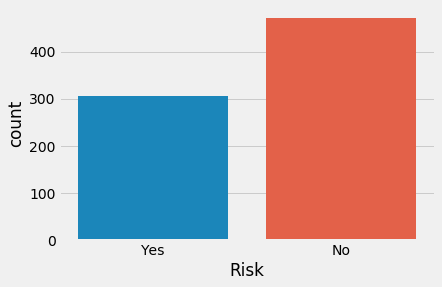

In [362]:
sns.countplot(df['Risk'], label = "Count") 

In [363]:
df.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk',
       'Audit_Risk', 'Risk'],
      dtype='object')

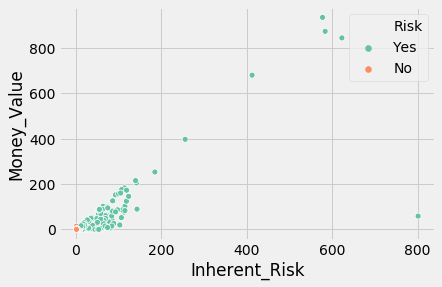

In [365]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="Inherent_Risk", y="Money_Value",
                     hue="Risk", 
                     palette="Set2",
                     data=df)

In [41]:
df['Risk'].value_counts()

No     471
Yes    305
Name: Risk, dtype: int64

The proportion of the value of risk of corporate farud happening is 39.30\%. That is to say, for the given data, the 

chances of the fraud happening is 39.30%

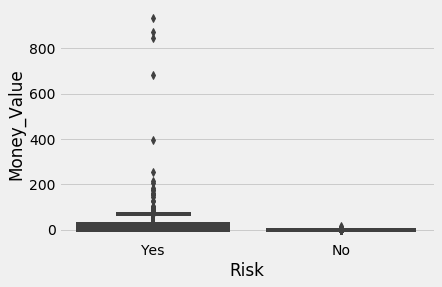

In [367]:
#Boxplot to Show of the customers who stayed or left the company, 
#To show mean amount charged to the customer monthly
ax = sns.boxplot(x="Risk", y="Money_Value", data=df)

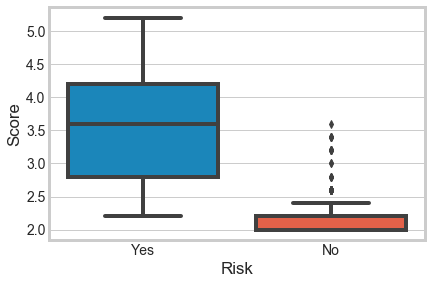

In [401]:
#Boxplot to Show of the customers who stayed or left the company, 
#To show mean amount charged to the customer monthly
ax = sns.boxplot(x="Risk", y="Score", data=df)

In [374]:
from mpl_toolkits.mplot3d import Axes3D

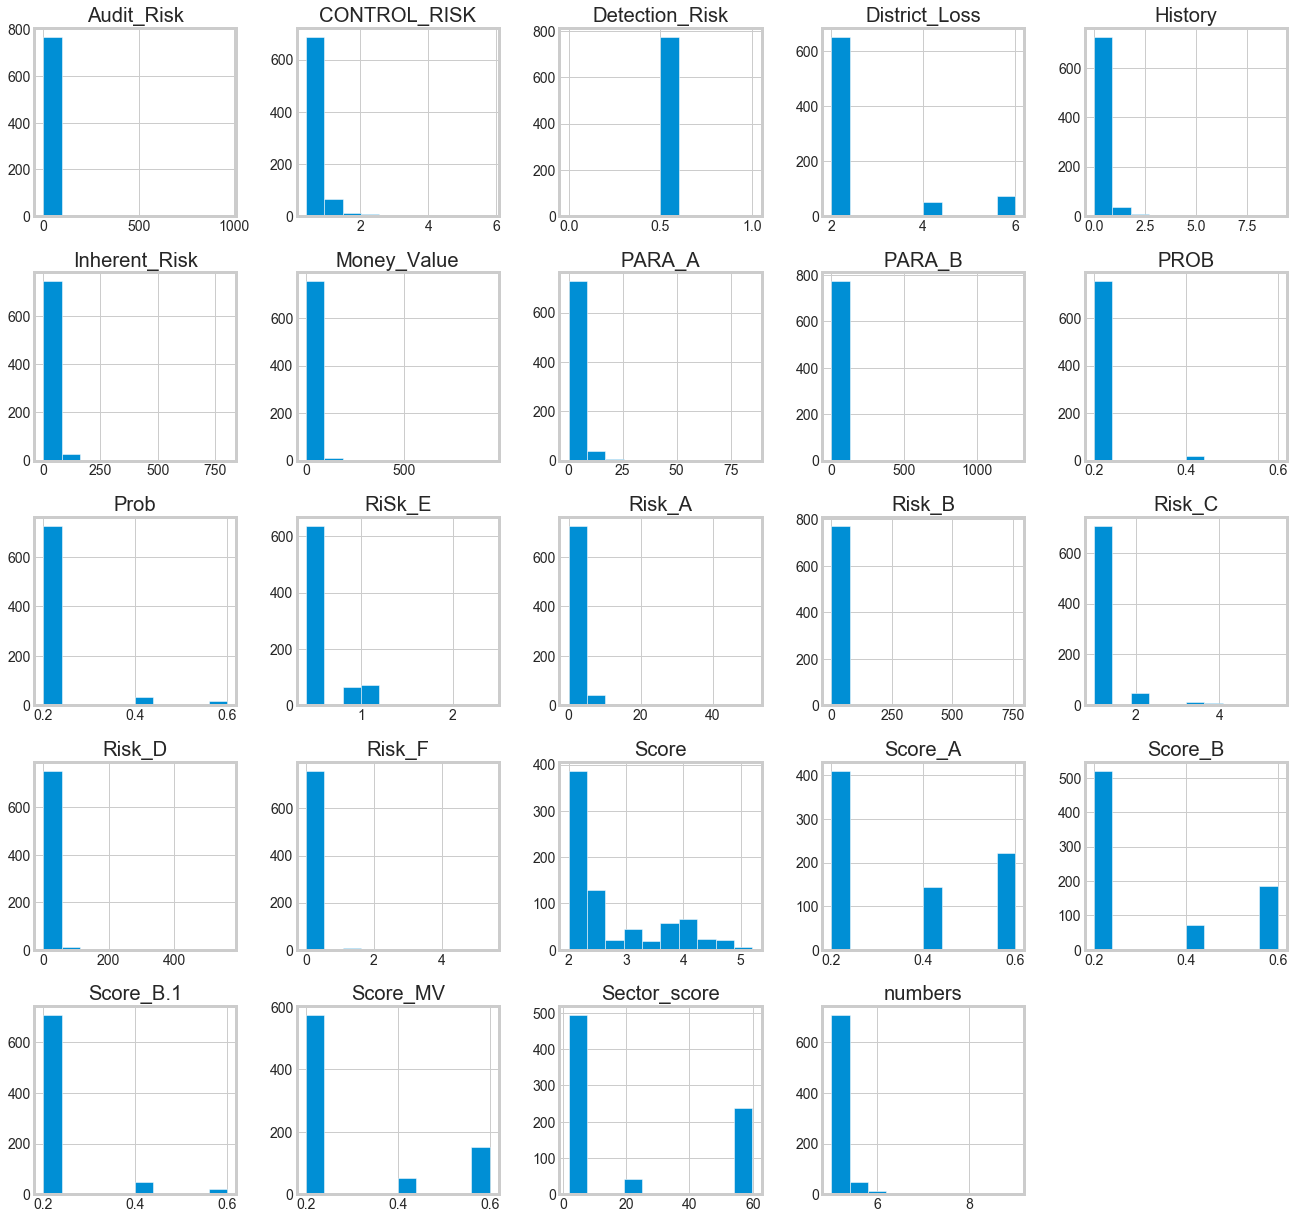

In [381]:
df.hist(figsize=(20,20))
plt.show()



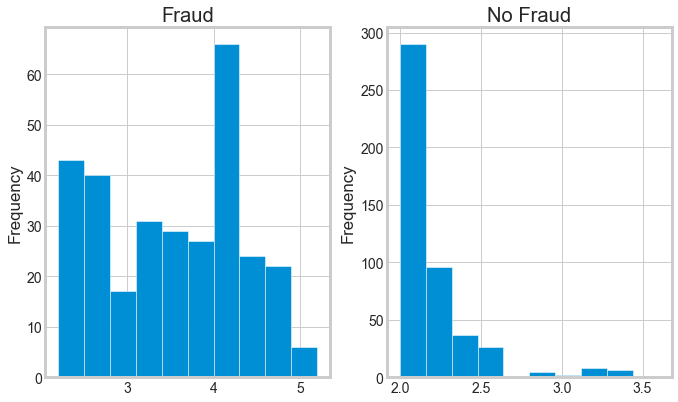

In [392]:
Fraud_transacation = df[df["Risk"]=='Yes']
Normal_transacation= df[df["Risk"]=='No']
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Score.plot.hist(title="Fraud")
plt.subplot(122)
Normal_transacation.Score.plot.hist(title="No Fraud")

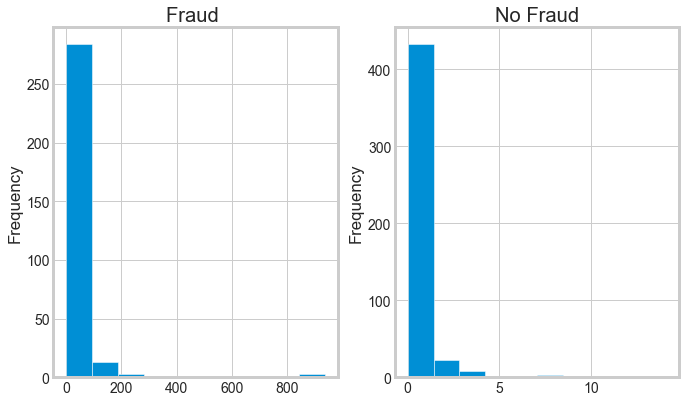

In [404]:
Fraud_transacation = df[df["Risk"]=='Yes']
Normal_transacation= df[df["Risk"]=='No']
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Money_Value.plot.hist(title="Fraud ")
plt.subplot(122)
Normal_transacation.Money_Value.plot.hist(title="No Fraud")

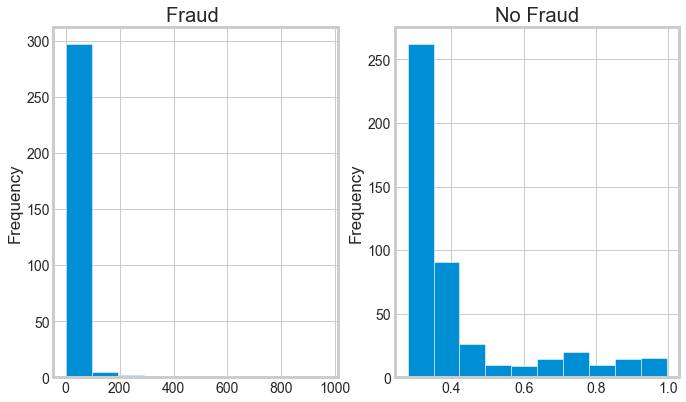

In [398]:
Fraud_transacation = df[df["Risk"]=='Yes']
Normal_transacation= df[df["Risk"]=='No']
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.Audit_Risk.plot.hist(title="Fraud ")
plt.subplot(122)
Normal_transacation.Audit_Risk.plot.hist(title="No Fraud")

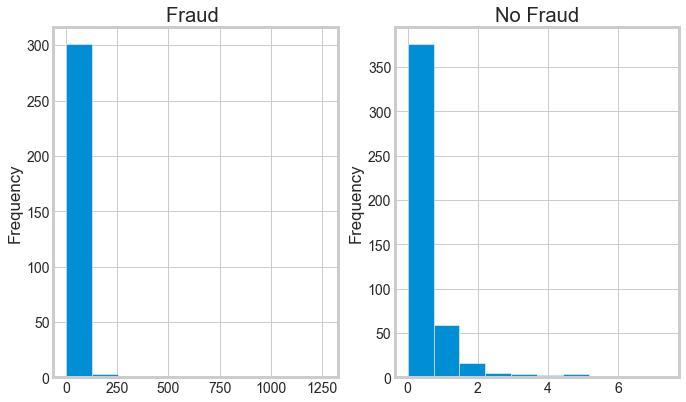

In [400]:
Fraud_transacation = df[df["Risk"]=='Yes']
Normal_transacation= df[df["Risk"]=='No']
plt.figure(figsize=(10,6))
plt.subplot(121)
Fraud_transacation.PARA_B.plot.hist(title="Fraud ")
plt.subplot(122)
Normal_transacation.PARA_B.plot.hist(title="No Fraud")

In [405]:
df.nunique()

Sector_score       13
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
numbers             5
Score_B.1           3
Risk_C              5
Money_Value       329
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
dtype: int64

In [406]:
from sklearn import decomposition

In [8]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
#iris = datasets.load_iris()
X = df.drop(["Risk"], axis=1)
y = df["Risk"]

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

NameError: name 'Axes3D' is not defined

<Figure size 288x216 with 0 Axes>

In [43]:
#Checking to see which varaibles have NA
df.isna().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [11]:
df1=pd.read_csv('~/Desktop/Datasets/audit_data.csv')

In [12]:
#Dropping non-important columns
df1.drop(columns=['LOCATION_ID','TOTAL'], inplace=True)
df1.columns = [c.replace(' ', '_') for c in df1.columns]
df1.info()
df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   PARA_A          776 non-null    float64
 2   Score_A         776 non-null    float64
 3   Risk_A          776 non-null    float64
 4   PARA_B          776 non-null    float64
 5   Score_B         776 non-null    float64
 6   Risk_B          776 non-null    float64
 7   numbers         776 non-null    float64
 8   Score_B.1       776 non-null    float64
 9   Risk_C          776 non-null    float64
 10  Money_Value     775 non-null    float64
 11  Score_MV        776 non-null    float64
 12  Risk_D          776 non-null    float64
 13  District_Loss   776 non-null    int64  
 14  PROB            776 non-null    float64
 15  RiSk_E          776 non-null    float64
 16  History         776 non-null    int64  
 17  Prob            776 non-null    flo

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk',
       'Audit_Risk', 'Risk'],
      dtype='object')

In [13]:
# checking the unique of the variables..
df1.nunique()

Sector_score       13
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
numbers             5
Score_B.1           3
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
dtype: int64

In [141]:
#Checking to see which varaibles have NA
df1.isna().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [14]:
#since there is one NA value for Money_Value stolen, I imputed it with mean value
df1['Money_Value'].fillna((df1['Money_Value'].mean()), inplace=True)
df1.isna().sum()





Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

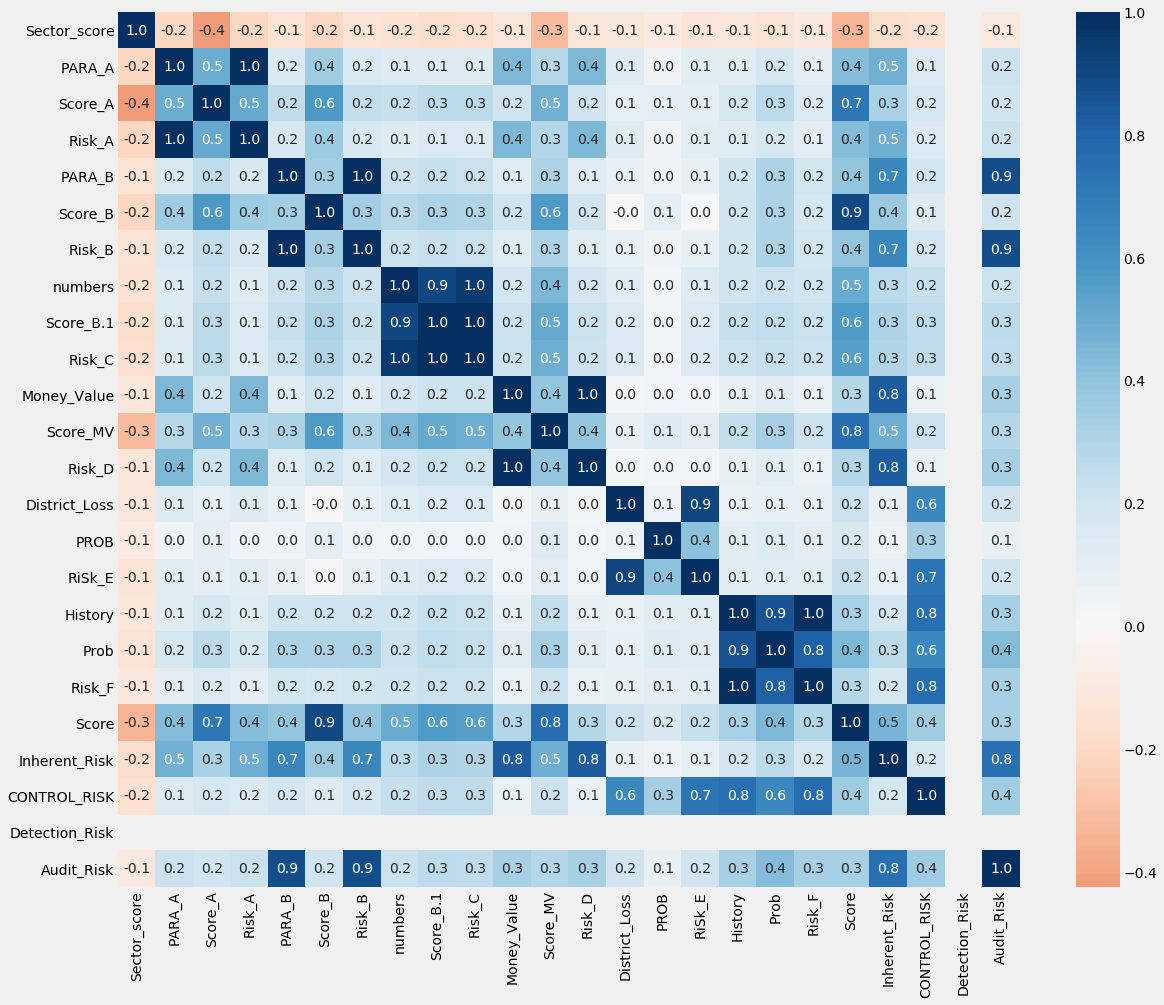

In [15]:
#Correlation plot to check the realtion between the variables
Independent_df=df1.drop(['Risk'], axis=1)
corr = Independent_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(18, 15)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

From the above two plots, we notice there is not correlation with the Detection

and thus it makes sense to delete it since it is not contributing to the model

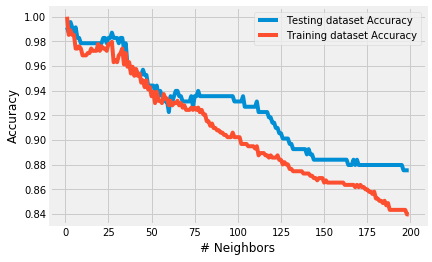

,Risk,PC1,PC2,PC3,PC4
0,1,-0.452572,-0.037299,0.228266,-0.008183
1,0,-0.661331,-0.068173,0.648870,-0.081589
2,0,-0.713086,-0.114088,0.631458,-0.027235
3,1,0.502354,0.295608,-1.885653,0.159790
4,0,-0.715665,-0.116034,0.630600,-0.025308
5,0,-0.676819,-0.134369,0.638722,-0.034151
6,1,0.662930,-0.412448,-0.476706,0.030288
7,1,0.382692,0.350145,-1.671790,0.115095
8,1,0.361471,0.342861,-1.677967,0.127456
9,0,-0.524181,-0.047538,0.208390,0.014955


In [99]:
neighbors = np.arange(1, 200) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('# Neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

features = ['Audit_Risk','Inherent_Risk', 'Score','Risk_D','Money_Value', 'PARA_B']
x = df.loc[:, features].values

y = df.loc[:,['Risk']].values

x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3', 'PC4'])

principalDf.head(5)

df[['Risk']].head()

finalDf = pd.concat([df[['Risk']], principalDf], axis = 1)
finalDf.head(10)

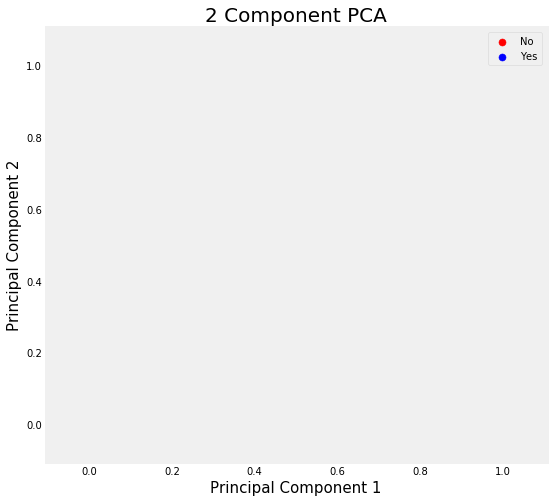

In [97]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


Risks = ['No', 'Yes']
colors = [ 'r', 'b']
for Risk, color in zip(Risks,colors):
    indicesToKeep = finalDf['Risk'] == Risk
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(Risks)
ax.grid()



In [16]:
#Droping the Detection Risk since it is correlated with other variables
Indpendent_df=Independent_df.drop(['Detection_Risk'], axis=1)

In [17]:
X=Independent_df.drop(['Detection_Risk'],axis=1)

In [146]:
y=df1['Risk']

In [18]:
from sklearn.naive_bayes import MultinomialNB

from dmba.metric import AIC_score

no display found. Using non-interactive Agg backend


In [19]:
from sklearn.model_selection import train_test_split,cross_val_score

In [20]:
# split into training and validation: Cross Validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=120)

# run naive Bayes
audit_nb = MultinomialNB(alpha=0.01)
audit_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = audit_nb.predict_proba(X_train)
predProb_valid = audit_nb.predict_proba(X_valid)

# predict class membership
y_valid_pred = audit_nb.predict(X_valid)
y_train_pred = audit_nb.predict(X_train)

In [21]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(465, 23) (465,)
(311, 23) (311,)


# Logistic Regression

In [22]:
train_df, valid_df = train_test_split(df1, test_size=0.4, random_state=123)

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1123)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1 ))

intercept  -3.185735404328081
       Sector_score    PARA_A   Score_A   Risk_A    PARA_B  Score_B    Risk_B  \
coeff     -0.168549  1.924595 -2.565814  0.10241  0.237657  2.77646  3.812926   

         numbers  Score_B.1  Risk_C  ...  District_Loss      PROB    RiSk_E  \
coeff -15.910078  -0.629797 -3.1413  ...      11.443338 -0.548101  2.654671   

        History      Prob    Risk_F     Score  Inherent_Risk  CONTROL_RISK  \
coeff  0.010694 -0.636006  0.005998  3.856097       6.146845      2.660669   

       Audit_Risk  
coeff    7.461304  

[1 rows x 23 columns]

AIC -351.96063726743023


In [27]:
from sklearn.metrics import classification_report
from dmba import classificationSummary

In [28]:
#Creating a confusion matrix 
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 282   0
     1   0 183
Confusion Matrix (Accuracy 0.9839)

       Prediction
Actual   0   1
     0 186   3
     1   2 120


In [29]:
#classification_report(train_y, logit_reg.predict(train_X))
print(classification_report(valid_y, logit_reg.predict(valid_X)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       189
           1       0.98      0.98      0.98       122

    accuracy                           0.98       311
   macro avg       0.98      0.98      0.98       311
weighted avg       0.98      0.98      0.98       311



In [155]:
print(classification_report(train_y, logit_reg.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00       183

    accuracy                           1.00       465
   macro avg       1.00      1.00      1.00       465
weighted avg       1.00      1.00      1.00       465



In [156]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))



Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 282   0
     1   0 183
Confusion Matrix (Accuracy 0.9839)

       Prediction
Actual   0   1
     0 186   3
     1   2 120


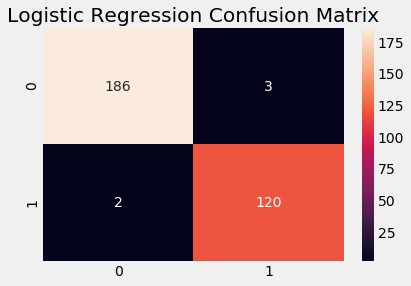

In [30]:
#Confsion matix plot
cmmat = confusion_matrix(valid_y, logit_reg.predict(valid_X))
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cmmat,annot=True,fmt="d")
plt.show()

In [31]:
rf = RandomForestClassifier(n_estimators=500, random_state=120)
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=120,
                       verbose=0, warm_start=False)

          feature  importance
16        History    0.000101
17           Prob    0.000107
18         Risk_F    0.000115
14           PROB    0.000510
8       Score_B.1    0.000819
9          Risk_C    0.000992
7         numbers    0.001260
0    Sector_score    0.004248
2         Score_A    0.008561
5         Score_B    0.019082
3          Risk_A    0.020776
13  District_Loss    0.021827
15         RiSk_E    0.027982
1          PARA_A    0.030121
21   CONTROL_RISK    0.030714
6          Risk_B    0.032131
11       Score_MV    0.040460
10    Money_Value    0.055186
4          PARA_B    0.056162
12         Risk_D    0.066365
19          Score    0.114819
20  Inherent_Risk    0.170304
22     Audit_Risk    0.297358


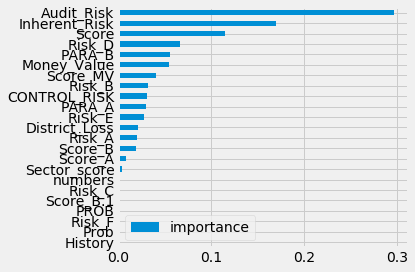

In [33]:
# Creating a feature importance plot

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh',  x='feature', legend=True)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [34]:
import statsmodels.api as sm

In [35]:
#Logistic Regression Summary
df = sm.add_constant(df1, prepend=True)

y = df1['Risk']
X = df1.drop(columns=['Risk', 'Detection_Risk', ])

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=120)

# use GLM (general linear model) with the binomial family to fit a logistic regression
logit_reg = sm.GLM(train_y, train_X, family=sm.families.Binomial())
logit_result = logit_reg.fit()
print(logit_result.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Risk   No. Observations:                  465
Model:                            GLM   Df Residuals:                      444
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 10 May 2020   Deviance:                          nan
Time:                        01:36:25   Pearson chi2:                 9.01e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Sector_score  -7.404e+11   1.49e+05  -4.98e+06

# Decision Tree Code

In [36]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

In [26]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [166]:
df2=pd.read_csv('~/Desktop/Datasets/audit_data.csv')
df2.drop(columns=['LOCATION_ID','TOTAL'], inplace=True)
df2.columns = [c.replace(' ', '_') for c in df1.columns]
df1.info()
df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   PARA_A          776 non-null    float64
 2   Score_A         776 non-null    float64
 3   Risk_A          776 non-null    float64
 4   PARA_B          776 non-null    float64
 5   Score_B         776 non-null    float64
 6   Risk_B          776 non-null    float64
 7   numbers         776 non-null    float64
 8   Score_B.1       776 non-null    float64
 9   Risk_C          776 non-null    float64
 10  Money_Value     776 non-null    float64
 11  Score_MV        776 non-null    float64
 12  Risk_D          776 non-null    float64
 13  District_Loss   776 non-null    int64  
 14  PROB            776 non-null    float64
 15  RiSk_E          776 non-null    float64
 16  History         776 non-null    int64  
 17  Prob            776 non-null    flo

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk',
       'Audit_Risk', 'Risk'],
      dtype='object')

# Decision Tree

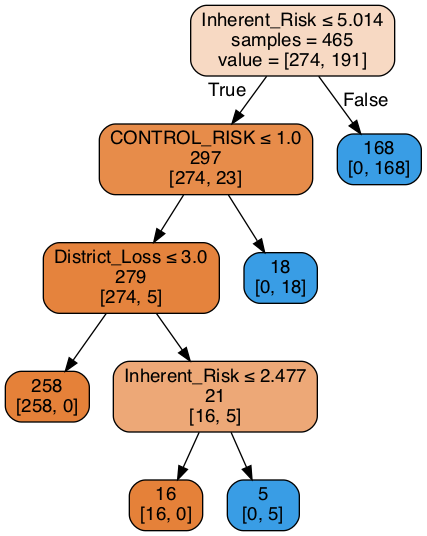

In [167]:
df2['Money_Value'].fillna((df2['Money_Value'].mean()), inplace=True)
X = df2.drop(columns=['Risk', 'Audit_Risk', 'Detection_Risk'])
y = df2['Risk']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=120)

fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

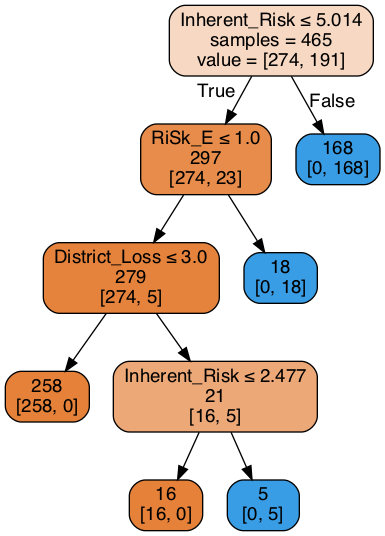

In [168]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(df2.drop(columns=['Risk']), df2['Risk'])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=120)

fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [169]:
#Computing a classification summary for the Decision Tree
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 274   0
     1   0 191
Confusion Matrix (Accuracy 0.9968)

       Prediction
Actual   0   1
     0 196   1
     1   0 114


In [170]:
print(classification_report(valid_y, fullClassTree.predict(valid_X)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       197
           1       0.99      1.00      1.00       114

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311



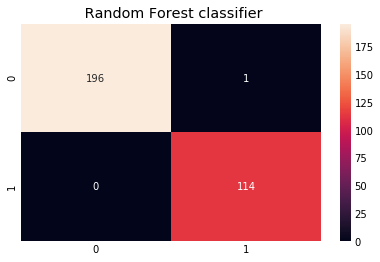

In [172]:
cmmat = confusion_matrix(valid_y, fullClassTree.predict(valid_X))
plt.title(' Random Forest classifier')
sns.heatmap(cmmat,annot=True,fmt="d")
plt.show()

In [40]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(465, 23) (465,)
(311, 23) (311,)


# Naive Bayes Code 

In [39]:
df3=pd.read_csv('~/Desktop/Datasets/audit_data.csv')
df3.drop(columns=['LOCATION_ID','TOTAL'], inplace=True)
df3.columns = [c.replace(' ', '_') for c in df1.columns]
df3.info()
df3.columns
df3['Money_Value'].fillna((df3['Money_Value'].mean()), inplace=True)
X = df3.drop(columns=['Risk'])
y = df3['Risk']


# split into training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

# run naive Bayes
naa_nb = MultinomialNB(alpha=0.01)
naa_nb.fit(X_train, y_train)

# predict probabilities
predProb_train = naa_nb.predict_proba(X_train)
predProb_valid = naa_nb.predict_proba(X_valid)

# predict class membership
y_valid_pred = naa_nb.predict(X_valid)
y_train_pred = naa_nb.predict(X_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   PARA_A          776 non-null    float64
 2   Score_A         776 non-null    float64
 3   Risk_A          776 non-null    float64
 4   PARA_B          776 non-null    float64
 5   Score_B         776 non-null    float64
 6   Risk_B          776 non-null    float64
 7   numbers         776 non-null    float64
 8   Score_B.1       776 non-null    float64
 9   Risk_C          776 non-null    float64
 10  Money_Value     775 non-null    float64
 11  Score_MV        776 non-null    float64
 12  Risk_D          776 non-null    float64
 13  District_Loss   776 non-null    int64  
 14  PROB            776 non-null    float64
 15  RiSk_E          776 non-null    float64
 16  History         776 non-null    int64  
 17  Prob            776 non-null    flo

In [41]:
#classification and  accuaracy of the confusion Matrix
classificationSummary(train_y, naa_nb.predict(X_train))
classificationSummary(valid_y,naa_nb.predict(X_valid))

Confusion Matrix (Accuracy 0.4968)

       Prediction
Actual   0   1
     0 169 105
     1 129  62
Confusion Matrix (Accuracy 0.5756)

       Prediction
Actual   0   1
     0 143  54
     1  78  36


In [42]:
print(classification_report(valid_y, naa_nb.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.65      0.73      0.68       197
           1       0.40      0.32      0.35       114

    accuracy                           0.58       311
   macro avg       0.52      0.52      0.52       311
weighted avg       0.56      0.58      0.56       311



# Creating a False positives and false Negatives

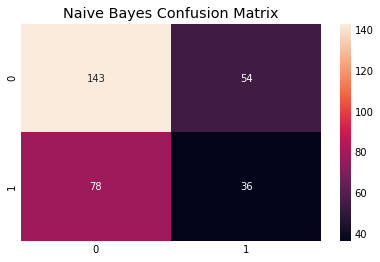

In [43]:
cmmat = confusion_matrix(valid_y, naa_nb.predict(X_valid))
plt.title('Naive Bayes Confusion Matrix')
sns.heatmap(cmmat,annot=True,fmt="d")
plt.show()

In [44]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart

# K Nearest Neighbors

In [45]:
#KNN model
dfk=pd.read_csv('~/Desktop/Datasets/audit_data.csv')
dfk.drop(columns=['LOCATION_ID','TOTAL', 'Detection_Risk'], inplace=True)
dfk.columns = [c.replace(' ', '_') for c in dfk.columns]
dfk.info()
dfk.columns
dfk['Money_Value'].fillna((dfk['Money_Value'].mean()), inplace=True)
#X = df3.drop(columns=['Risk'])
#y = df3['Risk']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   PARA_A         776 non-null    float64
 2   Score_A        776 non-null    float64
 3   Risk_A         776 non-null    float64
 4   PARA_B         776 non-null    float64
 5   Score_B        776 non-null    float64
 6   Risk_B         776 non-null    float64
 7   numbers        776 non-null    float64
 8   Score_B.1      776 non-null    float64
 9   Risk_C         776 non-null    float64
 10  Money_Value    775 non-null    float64
 11  Score_MV       776 non-null    float64
 12  Risk_D         776 non-null    float64
 13  District_Loss  776 non-null    int64  
 14  PROB           776 non-null    float64
 15  RiSk_E         776 non-null    float64
 16  History        776 non-null    int64  
 17  Prob           776 non-null    float64
 18  Risk_F    

In [46]:
dfk.columns

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk',
       'Risk'],
      dtype='object')

In [47]:
#setting KNN neighbors
knnclassifier=KNeighborsClassifier(n_neighbors=3)
y = dfk['Risk']
trainData, validData = train_test_split(dfk, test_size=0.4, random_state=120)
X_train, X_test, y_train, y_test = train_test_split(dfk, y, test_size=0.4,random_state=42 )
print(trainData.shape, validData.shape)

(465, 24) (311, 24)


In [48]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk']])  

# Transform the full dataset
dfkNorm = pd.concat([pd.DataFrame(scaler.transform(dfk[['Sector_score', 'PARA_A', 'Score_A',
                                    'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk']]), 
                    columns=['zSector_score', 'zPARA_A', 'zScore_A', 'zRisk_A', 'zPARA_B', 'zScore_B',
       'zRisk_B', 'znumbers', 'zScore_B.1', 'zRisk_C', 'zMoney_Value', 'zScore_MV',
       'zRisk_D', 'zDistrict_Loss', 'zPROB', 'zRiSk_E', 'zHistory', 'zProb',
       'zRisk_F', 'zScore', 'zInherent_Risk', 'zCONTROL_RISK', 'zAudit_Risk']),
                dfk[['Risk']]], axis=1)


In [49]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 

In [50]:
dfk=pd.read_csv('~/Desktop/Datasets/audit_data.csv')
dfk.drop(columns=['LOCATION_ID','TOTAL', 'Detection_Risk'], inplace=True)
dfk.columns = [c.replace(' ', '_') for c in dfk.columns]
dfk.info()
dfk.columns
dfk['Money_Value'].fillna((dfk['Money_Value'].mean()), inplace=True)
#X = df3.drop(columns=['Risk'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   PARA_A         776 non-null    float64
 2   Score_A        776 non-null    float64
 3   Risk_A         776 non-null    float64
 4   PARA_B         776 non-null    float64
 5   Score_B        776 non-null    float64
 6   Risk_B         776 non-null    float64
 7   numbers        776 non-null    float64
 8   Score_B.1      776 non-null    float64
 9   Risk_C         776 non-null    float64
 10  Money_Value    775 non-null    float64
 11  Score_MV       776 non-null    float64
 12  Risk_D         776 non-null    float64
 13  District_Loss  776 non-null    int64  
 14  PROB           776 non-null    float64
 15  RiSk_E         776 non-null    float64
 16  History        776 non-null    int64  
 17  Prob           776 non-null    float64
 18  Risk_F    

In [51]:
X = dfk.drop(columns=['Risk'])
y = dfk['Risk']


In [52]:
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 
  
neighbors = np.arange(1, 40) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))

In [53]:
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 

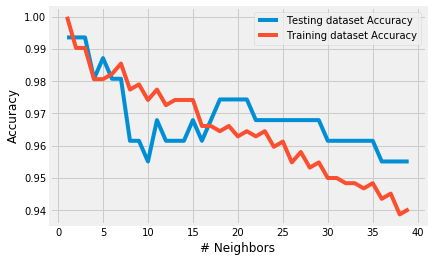

In [54]:
# Plots to show which data split has more accuracy
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('# Neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

As the K Nearest neighbors increase, Testing dataset is more accurate as compared to the Training dataset

In [55]:
# Printing the accurancy
print(knn.score(X_test, y_test)) 

0.9551282051282052


In [56]:
print(trainData.shape, validData.shape)

(465, 24) (311, 24)


# Normalizing the data into KNN

In [57]:
dfk=pd.read_csv('~/Desktop/Datasets/audit_data.csv')
dfk.drop(columns=['LOCATION_ID','TOTAL', 'Detection_Risk'], inplace=True)
dfk.columns = [c.replace(' ', '_') for c in dfk.columns]
dfk.info()
dfk.columns
dfk['Money_Value'].fillna((dfk['Money_Value'].mean()), inplace=True)
#X = df3.drop(columns=['Risk'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   PARA_A         776 non-null    float64
 2   Score_A        776 non-null    float64
 3   Risk_A         776 non-null    float64
 4   PARA_B         776 non-null    float64
 5   Score_B        776 non-null    float64
 6   Risk_B         776 non-null    float64
 7   numbers        776 non-null    float64
 8   Score_B.1      776 non-null    float64
 9   Risk_C         776 non-null    float64
 10  Money_Value    775 non-null    float64
 11  Score_MV       776 non-null    float64
 12  Risk_D         776 non-null    float64
 13  District_Loss  776 non-null    int64  
 14  PROB           776 non-null    float64
 15  RiSk_E         776 non-null    float64
 16  History        776 non-null    int64  
 17  Prob           776 non-null    float64
 18  Risk_F    

In [58]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class
# use the .drop() method to gather all features except Target Class
# axis -> argument refers to columns; a 0 would represent rows
scaler.fit(dfk.drop('Risk', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(dfk.drop('Risk',axis=1))
# Review the array of values generated from the scaled features process
scaled_features

array([[-0.67046481,  0.30480033,  1.42984618, ..., -0.16646776,
        -0.38866169, -0.14112307],
       [-0.67046481, -0.43173627, -0.86976136, ..., -0.27651262,
        -0.38866169, -0.17228042],
       [-0.67046481, -0.34187176, -0.86976136, ..., -0.29490218,
        -0.38866169, -0.17748711],
       ...,
       [ 1.45599165, -0.38944709, -0.86976136, ..., -0.29658393,
        -0.38866169, -0.17796327],
       [ 1.45599165, -0.39649529, -0.86976136, ..., -0.2968764 ,
        -0.38866169, -0.17804608],
       [ 1.45599165, -0.43173627, -0.86976136, ..., -0.29643769,
        -0.38866169, -0.17792186]])

# feature importances plot

          feature  importance
16        History    0.000101
17           Prob    0.000107
18         Risk_F    0.000115
14           PROB    0.000510
8       Score_B.1    0.000819
9          Risk_C    0.000992
7         numbers    0.001260
0    Sector_score    0.004248
2         Score_A    0.008561
5         Score_B    0.019082
3          Risk_A    0.020776
13  District_Loss    0.021827
15         RiSk_E    0.027982
1          PARA_A    0.030121
21   CONTROL_RISK    0.030714
6          Risk_B    0.032131
11       Score_MV    0.040460
10    Money_Value    0.055186
4          PARA_B    0.056162
12         Risk_D    0.066365
19          Score    0.114819
20  Inherent_Risk    0.170304
22     Audit_Risk    0.297358


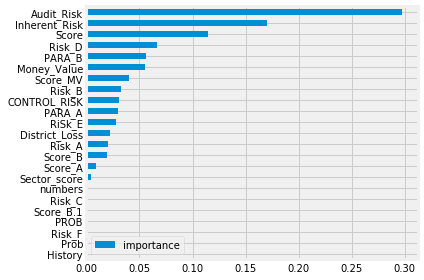

In [76]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

dfk = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
dfk = dfk.sort_values('importance')
print(dfk)

ax = dfk.plot(kind='barh',  x='feature', legend=True)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [77]:
#Reduced Model
rmod_df=pd.read_csv('~/Desktop/Datasets/audit_data.csv')
rmod_df.drop(columns=['LOCATION_ID','TOTAL', 'Detection_Risk'], inplace=True)
rmod_df.columns = [c.replace(' ', '_') for c in rmod_df.columns]
rmod_df.info()
rmod_df.columns
rmod_df['Money_Value'].fillna((rmod_df['Money_Value'].mean()), inplace=True)
#X = df3.drop(columns=['Risk'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   PARA_A         776 non-null    float64
 2   Score_A        776 non-null    float64
 3   Risk_A         776 non-null    float64
 4   PARA_B         776 non-null    float64
 5   Score_B        776 non-null    float64
 6   Risk_B         776 non-null    float64
 7   numbers        776 non-null    float64
 8   Score_B.1      776 non-null    float64
 9   Risk_C         776 non-null    float64
 10  Money_Value    775 non-null    float64
 11  Score_MV       776 non-null    float64
 12  Risk_D         776 non-null    float64
 13  District_Loss  776 non-null    int64  
 14  PROB           776 non-null    float64
 15  RiSk_E         776 non-null    float64
 16  History        776 non-null    int64  
 17  Prob           776 non-null    float64
 18  Risk_F    

# Reduced Model: Using Only Six Variables 

In [81]:
# Renaming the Risk 
rmod_df["Risk"] = rmod_df["Risk"].replace({1:"Yes",0:"No"})

In [82]:
predictors=['Audit_Risk','Inherent_Risk', 'Score','Risk_D','Money_Value', 'PARA_B']
outcome = 'Risk'
X = rmod_df[predictors]
y = rmod_df[outcome]
classes = ['Yes', 'NO']

In [83]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
#print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -63.774057902158034
       Audit_Risk  Inherent_Risk     Score    Risk_D  Money_Value    PARA_B
coeff   63.397124       -1.70905  1.923776  5.372329    -1.693501  0.342112



In [84]:
#Creating a confusion matrix 
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 273   0
     1   0 192
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 198   0
     1   0 113


In [85]:
print(classification_report(valid_y, logit_reg.predict(valid_X)))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       198
         Yes       1.00      1.00      1.00       113

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311



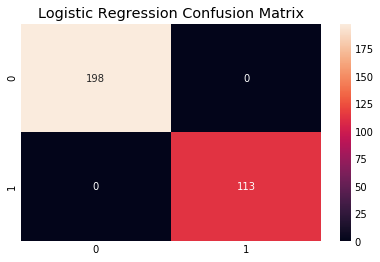

In [86]:
cmmat = confusion_matrix(valid_y, logit_reg.predict(valid_X))
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cmmat,annot=True,fmt="d")
plt.show()

In [87]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
# Fit the object to all the data except the Target Class

scaler.fit(rmod_df.drop('Risk', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [88]:
predictors=['Audit_Risk','Inherent_Risk', 'Score','Risk_D','Money_Value', 'PARA_B']
outcome = 'Risk'
X = rmod_df[predictors]
y = rmod_df[outcome]
classes = ['Yes', 'NO']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [267]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
# n_neighborsn
knn = KNeighborsClassifier(n_neighbors=1)
# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [268]:
# Use the .predict() method to make predictions from the X_test subset
pred = knn.predict(X_test)
# Review the predictions
pred

array(['No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'N

In [269]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.99      0.99      0.99       152
         Yes       0.99      0.99      0.99        81

    accuracy                           0.99       233
   macro avg       0.99      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



In [270]:
print(classificationSummary(y_test, pred))
#print(classificationSummary((X_train, y_train)))

Confusion Matrix (Accuracy 0.9914)

       Prediction
Actual   0   1
     0 151   1
     1   1  80
None


In [271]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 151
FP - False Positive 1
FN - False Negative 1
TP - True Positive 80
Accuracy Rate: 0.9914163090128756
Misclassification Rate: 0.008583690987124463


In [294]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

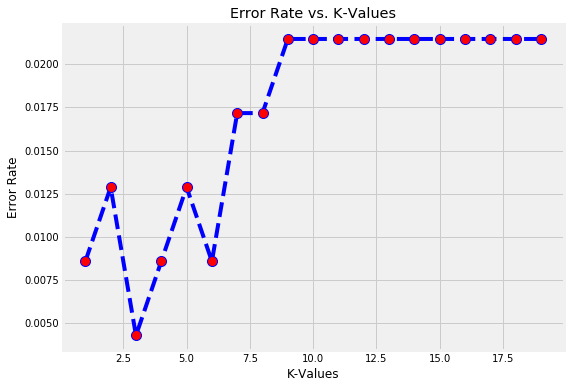

In [295]:
# Configure and plot error rate over k values
plt.figure(figsize=(8,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

In [274]:
# Retrain model using optimal k-value
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [275]:
# Print out classification report and confusion matrix
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.99      0.98      0.98       152
         Yes       0.96      0.98      0.97        81

    accuracy                           0.98       233
   macro avg       0.98      0.98      0.98       233
weighted avg       0.98      0.98      0.98       233



In [276]:
# Print out confusion matrix
cmat = confusion_matrix(y_test, pred)
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Error Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 149
FP - False Positive 3
FN - False Negative 2
TP - True Positive 79
Accuracy Rate: 0.9785407725321889
Error Rate: 0.02145922746781116


In [90]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# fit a logistic regression (set penalty=l2 and C=1e42 to avoid regularization)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
#print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -63.774057902158034
       Audit_Risk  Inherent_Risk     Score    Risk_D  Money_Value    PARA_B
coeff   63.397124       -1.70905  1.923776  5.372329    -1.693501  0.342112



In [91]:
#Creating a confusion matrix 
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 273   0
     1   0 192
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 198   0
     1   0 113


In [92]:
print(classification_report(valid_y, logit_reg.predict(valid_X)))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       198
         Yes       1.00      1.00      1.00       113

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311



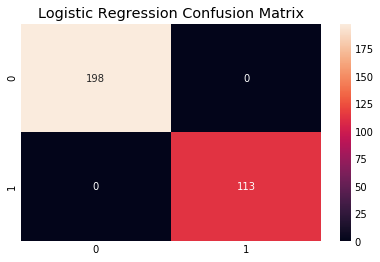

In [93]:
cmmat = confusion_matrix(valid_y, logit_reg.predict(valid_X))
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(cmmat,annot=True,fmt="d")
plt.show()

Reduced Model produces the 100% accuracy

